<a href="https://colab.research.google.com/github/Abdelmounim1996/Distributed-Learning-of-Finite-Gaussian-Mixtures/blob/main/TP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TP3: survie et estimation non-paramétrique***



*   Fonctions utiles

*   Analyse du jeu de données pharmacosmoking



# ***1 Fonctions utiles***

In [1]:
%load_ext rpy2.ipython 
 # The rmagic extension has been moved to rpy2 as rpy2.interactive.ipython . Magic command interface for interactive work with R via rpy2.

In [ ]:
%%R
install.packages("asaur")
install.packages("ggfortify")

In [4]:
%%R
library(survival)
library(asaur)
library(tidyverse)

In [5]:
%%R 
library(ggfortify)
glimpse(pharmacoSmoking)

Rows: 125
Columns: 14
$ id             <int> 21, 113, 39, 80, 87, 29, 16, 35, 54, 70, 84, 85, 25, 47…
$ ttr            <int> 182, 14, 5, 16, 0, 182, 14, 77, 2, 0, 12, 182, 21, 3, 1…
$ relapse        <int> 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1…
$ grp            <fct> patchOnly, patchOnly, combination, combination, combina…
$ age            <int> 36, 41, 25, 54, 45, 43, 66, 78, 40, 38, 64, 51, 37, 65,…
$ gender         <fct> Male, Male, Female, Male, Male, Male, Male, Female, Fem…
$ race           <fct> white, white, white, white, white, hispanic, black, bla…
$ employment     <fct> ft, other, other, ft, other, ft, pt, other, ft, ft, oth…
$ yearsSmoking   <int> 26, 27, 12, 39, 30, 30, 54, 56, 25, 23, 30, 35, 23, 50,…
$ levelSmoking   <fct> heavy, heavy, heavy, heavy, heavy, heavy, heavy, light,…
$ ageGroup2      <fct> 21-49, 21-49, 21-49, 50+, 21-49, 21-49, 50+, 50+, 21-49…
$ ageGroup4      <fct> 35-49, 35-49, 21-34, 50-64, 35-49, 35-49, 65+, 65+, 35-…
$ priorAttempts  <

In [6]:
%%R 
library(ggfortify)
glimpse(gastricXelox)

Rows: 48
Columns: 2
$ timeWeeks <int> 4, 8, 8, 8, 9, 11, 12, 13, 16, 16, 17, 17, 19, 21, 24, 24, 2…
$ delta     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


1. Créer une fonction permettant de calculer l'estimateur de Kaplan-Meier pour la fonction de survie. Elle devra pouvoir fonctionner avec les datasets pharmacoSmoking et gastricXelox. On pourra utiliser les fonctions (order et unique). Effectuer une représantation graphique de vos résultats : $\hat{S}(t)=\underset{i:ti<t}{\prod}(1-\dfrac{d_i}{Y_i}),$

$\color{red}{\text{Réponse : }}$


In [7]:
%%R
My.kaplan_Meier<-function( t , T, delta) { 
    # Parametres : 
    # ============
    # t      : time 
    # time  : temps_avant_quitter
    # delta : chute_ou_censure
    args = 1
    for (t_i in unique(T[T<= t]))
        {
        d = sum(delta[T==t_i])
        if (d!=0) { y=length(delta[T>=t_i]) ; args = args*(1-d/y)}
        } 
        return(args)
}

In [8]:
%%R
# parametres:
# ===========
# data : ___________pharmacoSmoking__________
# Time :***********************
time_1  = pharmacoSmoking$ttr
# delta : *********************
delta_1 = pharmacoSmoking$relapse
# data : ___________gastricXelox__________
# time : ************************
time_2  = gastricXelox$timeWeeks
# delta : ***********************
delta_2 = gastricXelox$delta

In [9]:
%%R 
graph_fcn <- function(T , delta   ){
# this function for plotting 
 max_time =max(T) ; lst=c()
 for (t in -1:max_time) {
 lst[t] = My.kaplan_Meier(t, T, delta)}
 plot(lst*100, type="s", xlab = "time", ylab = "surv (%)")
}

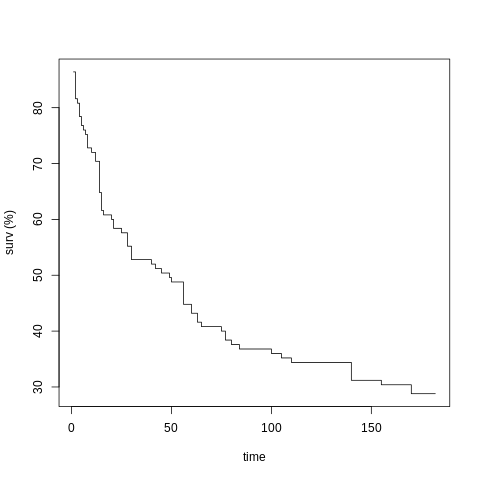

In [10]:
%%R
# estimator : survfit function : KM 
# data      :    pharmacoSmoking 
# graph : 
# ======
graph_fcn(time_1 , delta_1  )

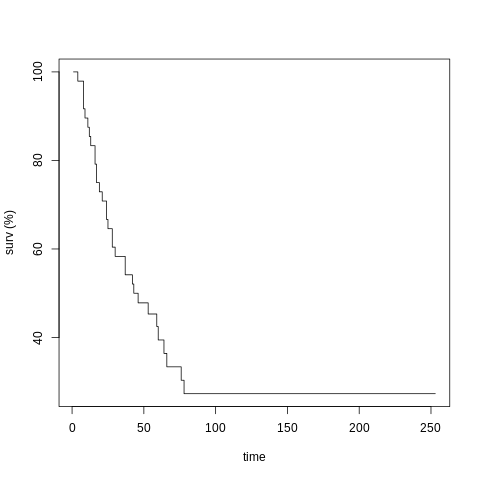

In [11]:
%%R
# estimator : survfit function : KM 
# data      : gastricXelox
# graph : 
# ======
graph_fcn(time_2 , delta_2  )

2. Créer une fonction permettant de calculer l'estimateur de Greenwood de la variance. Effectuer une représantation graphique de vos résultats.

In [12]:
%%R 
# ici la fonction Estimators nous permet de calculer Greenwood Nelson.Aalen Breslow en meme temps 
Estimators<-function(t , T , delta , estimator_option ){
    args = 0
    for (t_i in unique(T[T<= t]))
        {
        d = sum(delta[T==t_i])
        if (d!=0) 
            { 
            y=length(delta[T>=t_i])
            if( estimator_option == "Greenwood"){ args = args + d/y*(y-d) }
            else if ( estimator_option == "Nelson.Aalen") { args = args + d/y }
            else if  (estimator_option == "Breslow") {args = args-log(1 -d/y) }
            else  { print('estimator not found!')}
        }
        } 
        if( estimator_option == "Greenwood"){ args = args*My.kaplan_Meier( t , T, delta)**2 }
        args 
}

# cette fonction nous permet d'afficher le graphe pour chaque estimator : 
graph_fcn<- function(T , delta , option ){
 max_time =max(T)
 lst=c()
 for (t in -1:max_time) {
     lst[t] = Estimators(t , T , delta , option )}
 plot(lst, type="s", xlab = "time", ylab = "surv (%)")
}

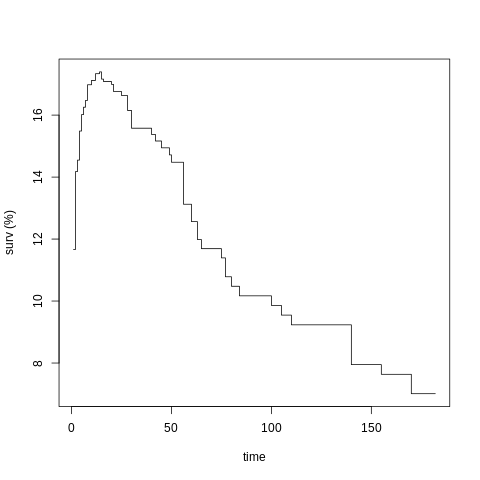

In [13]:
%%R
# estimator : Greenwood 
# data      : pharmacoSmoking
# graph : 
# ======
option = "Greenwood"
graph_fcn(time_1 , delta_1 , option )

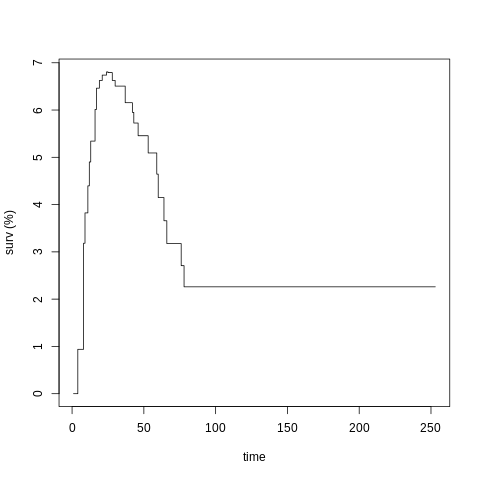

In [14]:
%%R
# estimator : Greenwood 
# data      : gastricXelox
# graph : 
# ======
option = "Greenwood"
graph_fcn(time_2 , delta_2 , option )

3. Créer une fonction permettant de calculer les estimateurs de Nelson-Aalen et de Breslow du risque cumulé. Effectuer une représantation graphique de vos résultats.

$\color{red}{\text{Réponse : }}$ il suffit de rajouter  dans la fonction precedente Estimators option = "Nelson-Aalen" , " Breslow " pour calculer les estimators  "Nelson-Aalen" , " Breslow "


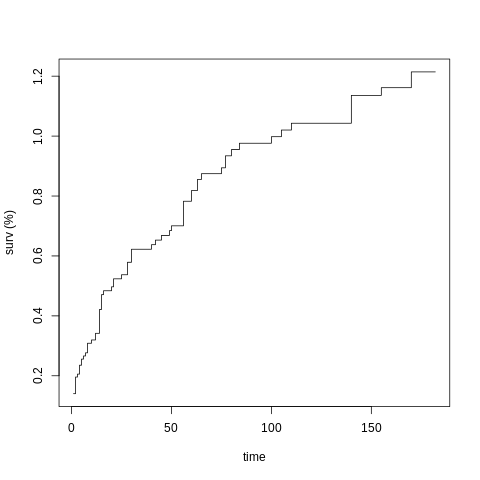

In [16]:
%%R
option = "Nelson.Aalen"
# estimator : "Nelson.Aalen"
# data      : pharmacoSmoking
# graph : 
# ======
graph_fcn(time_1 , delta_1 , option )

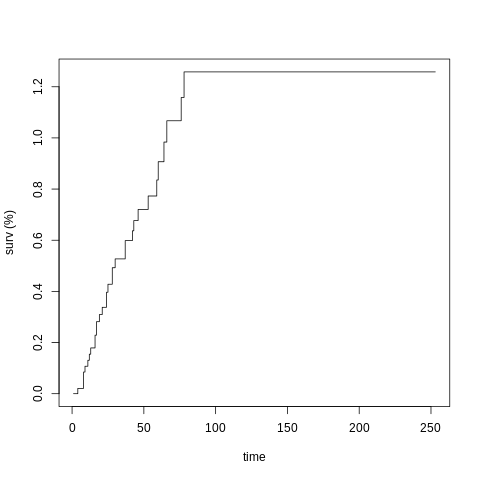

In [17]:
%%R
option = "Nelson.Aalen"
# estimator : "Nelson.Aalen"
# data : gastricXelox
# graph : 
# ======
graph_fcn(time_2 , delta_2 , option )

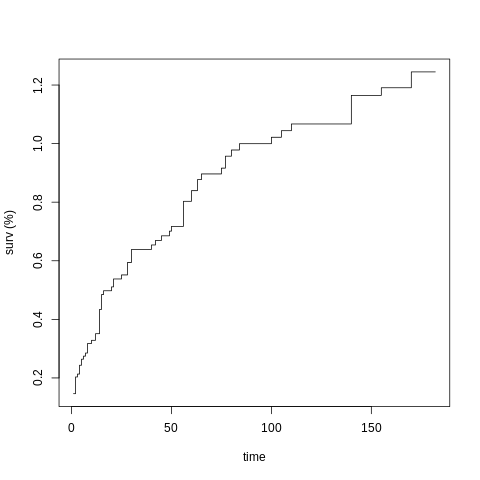

In [18]:
%%R
option = "Breslow"
# estimator : "Breslow"
# data : pharmacoSmoking
# graph : 
# ======
graph_fcn(time_1 , delta_1 , option )

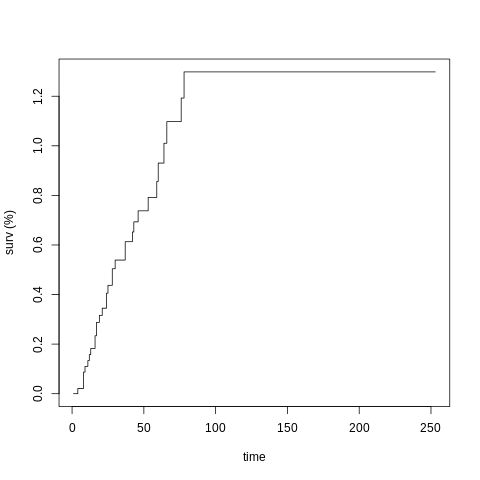

In [19]:
%%R
option = "Breslow"
# estimator : "Breslow"
# data : gastricXelox
# graph : 
# ======
graph_fcn(time_2 , delta_2 , option )

4. Créer une fonction renvoyant l'estimateur de la fonction de survie par la méthode actuarielle. Les pas de temps seront identiques et la fonction prendra en paramètre le nombre de coupures K. On comparera les résultats obtenus avec les résultats de l'estimateur de Kaplan-Meier pour différentes valeurs de K.

In [24]:
%%R
actuarial_method <- function(step, time, delta) {
 # estimateur de la fonction de survie par la méthode actuarielle.
 it=1 ; t_const = c(0) ; T_end  = max(time) ; x= T_end / step ; t_const = c(-1 : trunc(x)+1)*step
 s=c(1) ; N = length(t_const)-1
 for (it in 1:N ) {
 v=delta[(time>t_const[it] & time<=t_const[it+1])]
 d=sum(v)
 c=sum(abs(v-1))
 y=length(time[time>=t_const[it]])
 s=append(s, s[it]*(1-(d/(y-(c/2)))))
 }
 return(data.frame( Temps =t_const , Survie = s))
}

In [52]:
%%R
# example   :1 
# step      : 20
# estimator : actuarial_method
# data      : pharmacoSmoking
# ======
step = 20
s2=actuarial_method(step , time_1 , delta_1)
s2

   Temps    Survie
1      0 1.0000000
2     20 0.6960000
3     40 0.6044211
4     60 0.5036842
5     80 0.4407237
6    100 0.4223602
7    120 0.4039967
8    140 0.3664156
9    160 0.3578943
10   180 0.3390578
11   200 0.3390578


In [49]:
%%R
# example:2
# step : 10
# estimator : actuarial_method
# data : pharmacoSmoking
# graph : 
# ======
K = 10
s1=actuarial_method(K, time_1, delta_1)
s1

   Temps    Survie
1      0 1.0000000
2     10 0.8160000
3     20 0.6814945
4     30 0.6007912
5     40 0.5920841
6     50 0.5562002
7     60 0.4934034
8     70 0.4669711
9     80 0.4303459
10    90 0.4213804
11   100 0.4122199
12   110 0.3942973
13   120 0.3942973
14   130 0.3942973
15   140 0.3576185
16   150 0.3576185
17   160 0.3484488
18   170 0.3301094
19   180 0.3301094
20   190 0.3301094


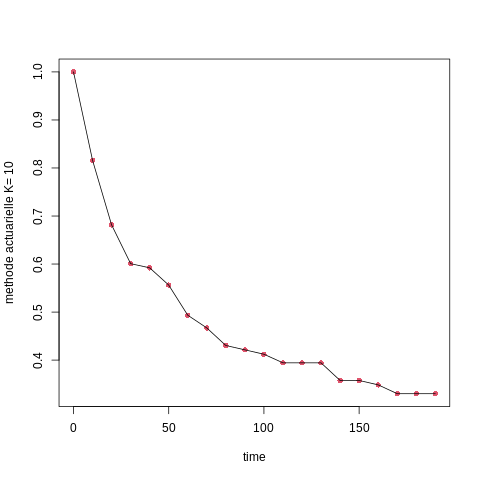

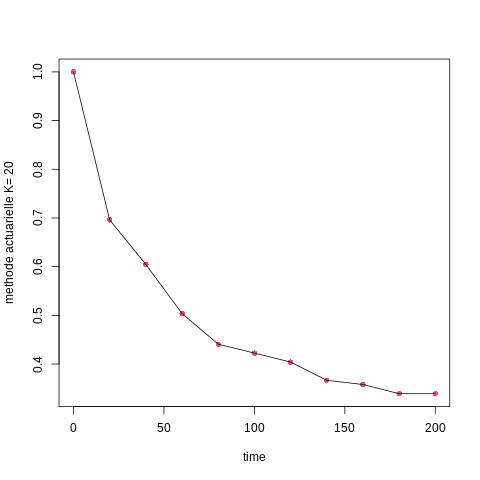

In [56]:
%%R
#le graphe de la fcN de survie de pharmacoSmoking, methode actuarielle.
plot(s1$Temps, s1$Survie, type="p", col=2, pch=16, xlab = "time", ylab = "methode actuarielle K= 10")
lines(s1$Temps, s1$Survie)
plot(s2$Temps, s2$Survie, type="p", col=2, pch=16, xlab = "time", ylab = "methode actuarielle K= 20")
lines(s2$Temps, s2$Survie)



5. Comparrer les résultats obtenus à la question 1 et 2 avec ceux de la fonction survfit (package survival).

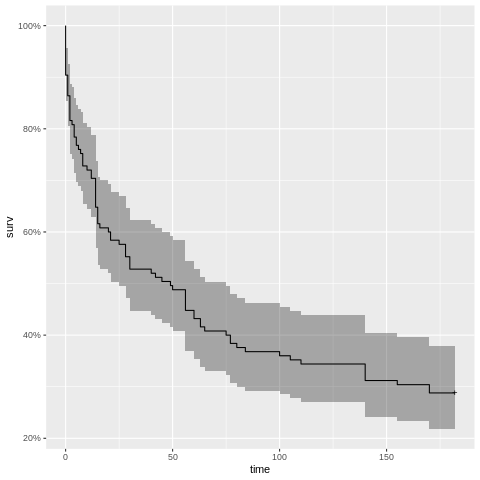

In [57]:
%%R
km = survfit(Surv(ttr, relapse) ~1, data = pharmacoSmoking)
autoplot( km )

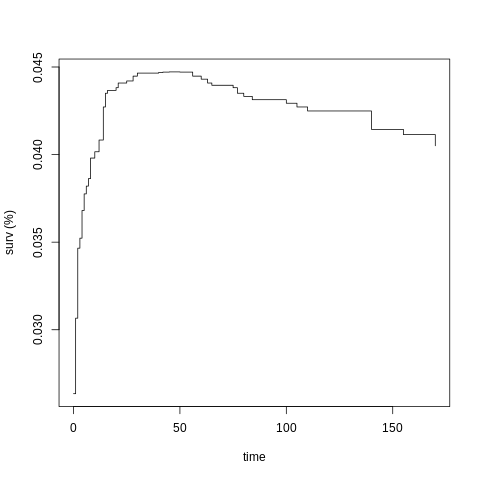

In [58]:
%%R
# model     : survfit 
# estimator : std.err
model <-summary(km)
plot(model$time , model$std.err , type="s", xlab = "time", ylab = "surv (%)")

le graphe est plus sophistiqué que celui qu’on a implementé en plus il affiche aussi l'intervalle de confiance ce qui nous permet de bien interpreter le resultat

# ***2 Analyse du jeu de données pharmacosmoking***

Etudier l'impact des covariables levelSmoking, grp, ageGroup2, ageGroup4 et employment. L'objet de cette question est l'interprétation et la présentation scientifique des résulats que vous avez obtenus, soit par vos fonctions soit par la fonction survfit ( voir fonction summary et attributes appliquées à l'objet de classe survfit). On pensera notamment à utiliser des tests et des intervalles de confiance appliqués à quelques instants choisis de l'espace de temps.

In [62]:
%%R
attributes(km)

$names
 [1] "n"         "time"      "n.risk"    "n.event"   "n.censor"  "surv"     
 [7] "std.err"   "cumhaz"    "std.chaz"  "type"      "logse"     "conf.int" 
[13] "conf.type" "lower"     "upper"     "call"     

$class
[1] "survfit"



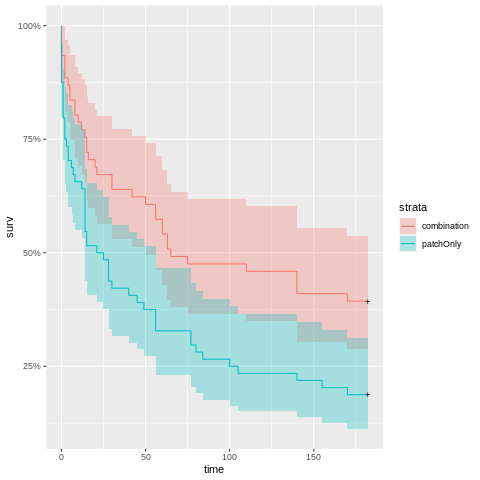

In [64]:
%%R
km = survfit(Surv(ttr, relapse) ~ grp, data = pharmacoSmoking)
autoplot( km )

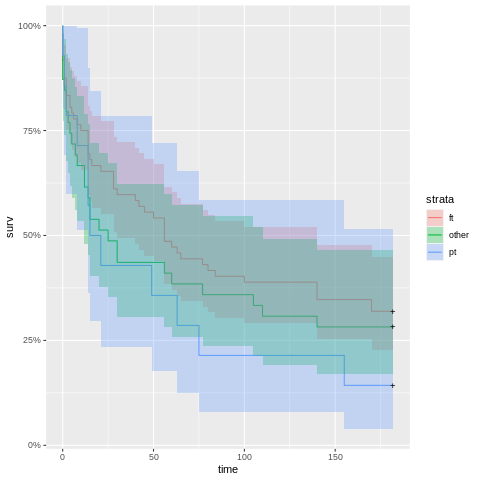

In [70]:
%%R
km = survfit(Surv(ttr, relapse) ~ employment , data = pharmacoSmoking)
autoplot( km )

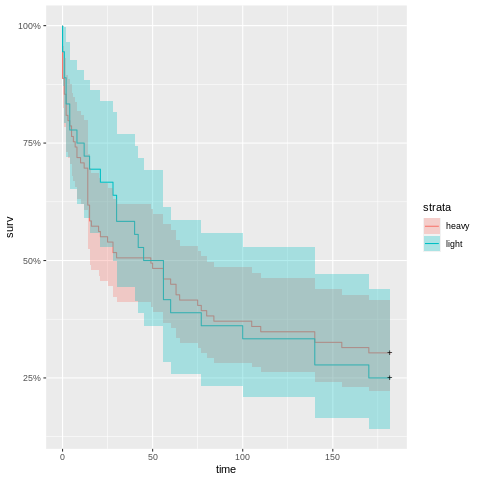

In [71]:
%%R
km = survfit(Surv(ttr, relapse) ~ levelSmoking, data = pharmacoSmoking)
autoplot( km )

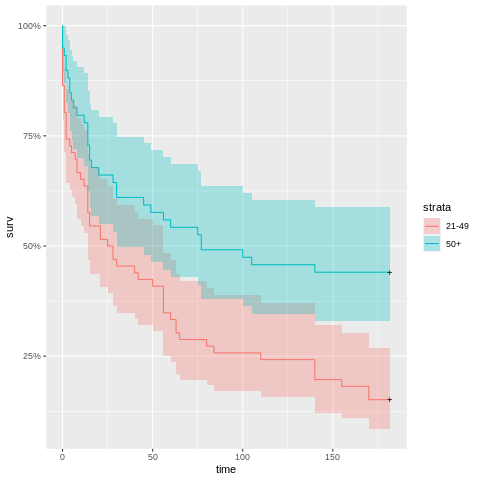

In [72]:
%%R
km = survfit(Surv(ttr, relapse) ~ ageGroup2, data = pharmacoSmoking)
autoplot( km )


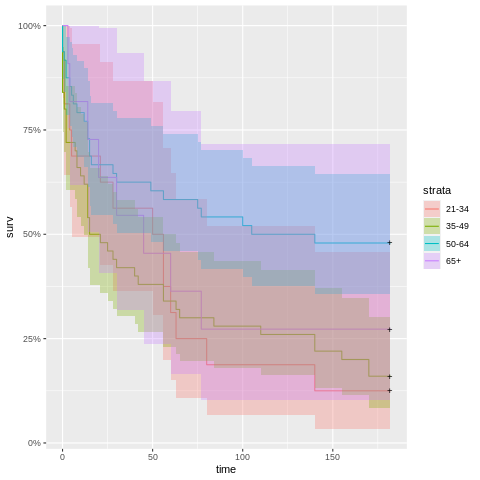

In [73]:
%%R
km = survfit(Surv(ttr, relapse) ~ ageGroup4, data = pharmacoSmoking)
autoplot( km )

graphiquement pour les variables :  grp  , ageGroup2 on voit bien que les deux fonctions de survie sont pas seulement  bien séparer mais aussi les intervalles de confiance de chacun sont aussi séparer ce qui rendre confirme que la Différence entre les 2 courbes  de survie est bien a un sens ou bien statiquement est significative donc on peut dire probablement que les deux courbes viens de 2 distributions Différentes





les autres variables 
intervalles de confiance sont bien confondus donc on peut dire que les défferences qu'on voit sur les courbes de survie de chaque covariables n'a pas de sens et que ils vient finalelment de la meme distribution